### Epsilon- greedy

Greedy is picking the bandit with highest MLE win rate with no regard to confidence in prediction or amount of data collected

Epsilon is the small probability of doing something random

https://www.geeksforgeeks.org/epsilon-greedy-algorithm-in-reinforcement-learning/

In [1]:
# Libraries
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import pandas as pd

Finding the best restaurant with best meal in town

Every trail gets a reward with every best meal from a restaurant.

Exploration and exploitation approach is used to find the best place to have a meal for the rest of the days in that town

Exploration - Imagine we have 300 days to experiment three places. 100 days each stores and respective rewards/happiness (true mean) based on data
Exploitation - 1st, 2nd and 3rd - R1, R2 and R3 you will go and select a best out of three days based on single occurence and for the rest of the days of experiment, it would be continued.

In [70]:
class restuarants:
    def __init__(self,m):
        self.m=m #true win rate
        self.mean=0 # estimated win
        self.N=0 # number of samples collected
    def choose(self):
        return npr.randn()+self.m
    def update_mean(self,x):
        self.N+=1
        self.mean=(1-(1.0/self.N))*self.mean + (1.0/self.N)*x
        
def epsilon_greedy(r1,r2,r3,eps,N):
    trails=([restuarants(r1),restuarants(r2),restuarants(r3)])
    num_times_explored=0
    num_times_exploited=0
    num_optimal =0
    optimal_j=np.argmax([b.m for b in trails])
    true_mean =trails[optimal_j]
    print(f'true_mean:{true_mean}')
    data=np.empty(N)
    for i in range(N):
        p=npr.random()
        if p < eps:
            num_times_explored +=1
            j=npr.choice(3)
        else:
            num_times_exploited +=1
            j=np.argmax([a.mean for a in trails])
        x=trails[j].choose()
        # print(f'x_N:{x}')
        trails[j].update_mean(x)
        # rho=(true_mean-trails[j])
        # print(f'rho:{rho}')
        if j==optimal_j:
            num_optimal +=1
        # for plot
        data[i]=x
        
    cumulative_avg= np.cumsum(data)/(np.arange(N)+1)
    
    print(f'Number of times explored: {num_times_explored}')
    print(f'Number of times exploited: {num_times_exploited}')
    print(f'number of optimals:{num_optimal}')
    
    plt.plot(cumulative_avg,label=f'eps:{eps}')
    plt.plot(np.ones(N)*r1)#,label=f'R1-{eps}')
    plt.plot(np.ones(N)*r2)#,label=f'R2-{eps}')
    plt.plot(np.ones(N)*r3)#,label=f'R3-{eps}')
    plt.xscale('log')
    plt.legend()
    plt.grid()
    
    for b in trails:
        print(b.mean)
    return cumulative_avg

true_mean:<__main__.restuarants object at 0x000002266F4FB188>
Number of times explored: 37
Number of times exploited: 263
number of optimals:245
mean_estimate: 9.954196232635972
mean_estimate: 8.079993037893859
mean_estimate: 4.807766584396315
9.954196232635972
8.079993037893859
4.807766584396315


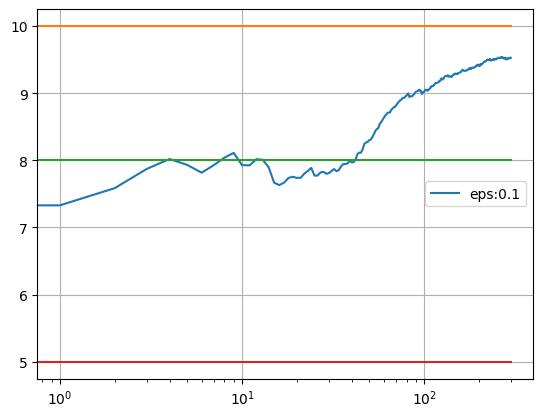

In [72]:
if __name__ == '__main__': 
    
        m1,m2,m3=10,8,5
        c_1 = epsilon_greedy(m1, m2, m3, 0.1, 300) 
        # c_05 = epsilon_greedy(m1, m2, m3, 0.05, 300) 
        # c_01 = epsilon_greedy(m1, m2, m3, 0.01, 300) 

### Optimistic Initial value selection

In [98]:
class restuarants:
    def __init__(self,m):
        self.m=m #true win rate
        self.mean=5. # optimistic initial value
        self.N=1 # number of samples collected should mentioned 
    def choose(self):
        return npr.randn()<self.m
    def update_mean(self,x):
        self.N+=1
        ### update mean of optimistic initial value selection
        self.mean=((self.N-1)*self.mean +x)/self.N
        
def epsilon_greedy(r1,r2,r3,eps,N):
    trails=([restuarants(r1),restuarants(r2),restuarants(r3)])
    data=np.zeros(N)
    for i in range(N):
        j=np.argmax([a.mean for a in trails])
        x=trails[j].choose()
        # print(f'x_N:{x}')
        trails[j].update_mean(x)
        # for plot
        data[i]=x
        
    cumulative_avg= np.cumsum(data)/(np.arange(N)+1)
    print(f'total_number_of_rewards_earned: {data.sum()}')
    print(f'win_rate:{data.sum()/N}')
    for r in trails:
        print(f'mean_estimate: {r.mean}')
    plt.plot(cumulative_avg,label=f'eps:{eps}')
    plt.plot(np.ones(N)*r1)#,label=f'R1-{eps}')
    plt.plot(np.ones(N)*r2)#,label=f'R2-{eps}')
    plt.plot(np.ones(N)*r3)#,label=f'R3-{eps}')
    plt.xscale('log')
    plt.legend()
    plt.grid()
    
    

total_number_of_rewards_earned: 255.0
win_rate:0.51
mean_estimate: 0.5263157894736842
mean_estimate: 0.5250000000000001
mean_estimate: 0.5388235294117646


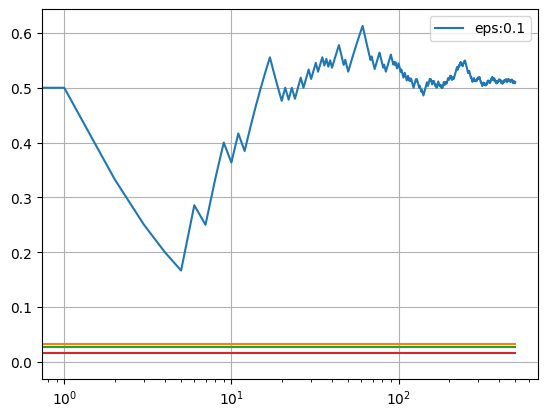

In [99]:
if __name__ == '__main__': 
        N=500
        m1,m2,m3=10/300,8/300,5/300
        c_1 = epsilon_greedy(m1, m2, m3, 0.1, N) 
        # c_05 = epsilon_greedy(m1, m2, m3, 0.05, 300) 
        # c_01 = epsilon_greedy(m1, m2, m3, 0.01, 300) 

In [85]:
m1,m2,m3

(0.03333333333333333, 0.02666666666666667, 0.016666666666666666)